In [1]:
import pandas as pd
import numpy as np
from scipy.stats.mstats import pearsonr, spearmanr
import seaborn as sns
import matplotlib.pyplot as plt

DMRcpgfile='/Users/irffanalahi/Research/Research_update/SM/ShowcaseSM/BL17_14/BL14_feature_significance/mNeu/fromReftoPerfomance_singlecpgbased/everything_single_cpg/BL14_all_matrixCin_nr0.4_imputed_rowmean.txt_bg_intesectedwith_BL14mNeuDMRs_CW.7.txt'#'/Users/irffanalahi/Research/Research_update/SM/ShowcaseSM/BL17_14/BL14_feature_significance/CD4/fromReftoPerfomance/singleCpGbased/everythingsinglecpg/BL14_all_matrixCin_nr0.4_imputed_rowmean.txt_bg_intesectedwith_CD4DMRofBL14atleast.2SM.txt'
RDstatfile='/Users/irffanalahi/Research/Research_update/SM/ShowcaseSM/BL17_14/BL14_feature_significance/mNeu/fromReftoPerfomance_singlecpgbased/everything_single_cpg/BL14_atleast.2_top-1_singleCpG_final_assignedref_uniq.txt_result_final.txt_folder_mincpg1_feature_significance_Allfile_CpGwise_avg.txt'#'/Users/irffanalahi/Research/Research_update/SM/ShowcaseSM/BL17_14/BL14_feature_significance/CD4/fromReftoPerfomance/singleCpGbased/everythingsinglecpg/mincpg1_feature_significance_Allfile_CpGwise_avg.txt'
celltype='mNeu' #################################
cpgdf=pd.read_csv(DMRcpgfile,sep="\t",index_col=['chrom','start','end'])
cpgdf.head()

CD4       CD8        nB        NK        Mn  \
chrom start    end                                                          
chr1  13711400 13711402  1.000000  0.958000  0.982333  0.954000  0.947333   
      13711460 13711462  0.980000  0.915000  0.983000  0.955000  0.954333   
      13711468 13711470  0.970000  0.950667  0.993333  0.946667  0.934667   
      13711601 13711603  0.966000  0.940667  0.973333  0.951000  0.915333   
      21459674 21459676  0.962667  0.926000  0.977667  0.962000  0.745000   

                          mNeu      m8        DC      Eo      Tr     m4  \
chrom start    end                                                        
chr1  13711400 13711402  0.018  1.0000  0.971667  0.7655  0.9815  0.982   
      13711460 13711462  0.005  0.9785  0.894333  0.7255  0.9875  0.973   
      13711468 13711470  0.005  0.9590  0.926333  0.7575  1.0000  0.960   
      13711601 13711603  0.036  0.9750  0.833333  0.7875  0.9505  0.963   
      21459674 21459676  0.017  1.0000  0.675333  0.5925  0.9375  0.963   

                             Mg      Er        mB shouldbechrom       pos  \
chrom start    end                                                          
chr1  13711400 13711402  0.9680  0.9250  0.913000          chr1  13711401   
      13711460 13711462  0.9425  0.9035  0.990667          chr1  13711461   
      13711468 13711470  0.9330  0.8295  0.976333          chr1  13711469   
      13711601 13711603  0.8890  0.8130  0.947000          chr1  13711602   
      21459674 21459676  0.9640  0.9440  0.972000          chr1  21459675   

                        DMRchr  DMRstart    DMRend DMRname  
chrom start    end                                          
chr1  13711400 13711402   chr1  13711401  13711603    DMR1  
      13711460 13711462   chr1  13711401  13711603    DMR1  
      13711468 13711470   chr1  13711401  13711603    DMR1  
      13711601 13711603   chr1  13711401  13711603    DMR1  
      21459674 21459676   chr1  21459675  21459830    DMR2

In [2]:
RDstatdf=pd.read_csv(RDstatfile,sep="\t")
#RDstatdf.rename(columns={'chrom':'DMRchr','start':'DMRstart','end':'DMRend'},inplace=True)
RDstatdf.head()

,chrom,start,end,#TP_fragment,#FP_fragment,#TN_fragment,#FN_fragment,#Total_Fragment,TPR,FPR,FDR
0,chr1,13711400,13711402,13.05,7.316667,152.733333,0.70,173.800000,0.979357,0.053203,0.739107
1,chr1,13711460,13711462,21.30,6.650000,182.866667,0.05,210.866667,0.999406,0.035457,0.708345
2,chr1,13711468,13711470,22.75,7.466667,180.233333,0.05,210.500000,0.999439,0.039700,0.714615
3,chr1,13711601,13711603,11.10,11.500000,86.350000,0.00,108.950000,1.000000,0.111209,0.759482
4,chr1,21459674,21459676,35.20,29.516667,238.783333,1.30,304.800000,0.861458,0.112271,0.772388


In [3]:
cpgdf=cpgdf.drop(['shouldbechrom','pos'],axis=1)
cpgdf.head()

CD4       CD8        nB        NK        Mn  \
chrom start    end                                                          
chr1  13711400 13711402  1.000000  0.958000  0.982333  0.954000  0.947333   
      13711460 13711462  0.980000  0.915000  0.983000  0.955000  0.954333   
      13711468 13711470  0.970000  0.950667  0.993333  0.946667  0.934667   
      13711601 13711603  0.966000  0.940667  0.973333  0.951000  0.915333   
      21459674 21459676  0.962667  0.926000  0.977667  0.962000  0.745000   

                          mNeu      m8        DC      Eo      Tr     m4  \
chrom start    end                                                        
chr1  13711400 13711402  0.018  1.0000  0.971667  0.7655  0.9815  0.982   
      13711460 13711462  0.005  0.9785  0.894333  0.7255  0.9875  0.973   
      13711468 13711470  0.005  0.9590  0.926333  0.7575  1.0000  0.960   
      13711601 13711603  0.036  0.9750  0.833333  0.7875  0.9505  0.963   
      21459674 21459676  0.017  1.0000  0.675333  0.5925  0.9375  0.963   

                             Mg      Er        mB DMRchr  DMRstart    DMRend  \
chrom start    end                                                             
chr1  13711400 13711402  0.9680  0.9250  0.913000   chr1  13711401  13711603   
      13711460 13711462  0.9425  0.9035  0.990667   chr1  13711401  13711603   
      13711468 13711470  0.9330  0.8295  0.976333   chr1  13711401  13711603   
      13711601 13711603  0.8890  0.8130  0.947000   chr1  13711401  13711603   
      21459674 21459676  0.9640  0.9440  0.972000   chr1  21459675  21459830   

                        DMRname  
chrom start    end               
chr1  13711400 13711402    DMR1  
      13711460 13711462    DMR1  
      13711468 13711470    DMR1  
      13711601 13711603    DMR1  
      21459674 21459676    DMR2

In [4]:
colnames=cpgdf.columns.tolist()
otherct=colnames[0:colnames.index('DMRchr')]
otherct.remove(celltype)
len(otherct)

13

In [5]:
otherct

['CD4',
 'CD8',
 'nB',
 'NK',
 'Mn',
 'm8',
 'DC',
 'Eo',
 'Tr',
 'm4',
 'Mg',
 'Er',
 'mB']

In [6]:
othermean=cpgdf[otherct].mean(axis=1)
cpgdf['othermean']=othermean

In [7]:
cpgdf.head()

CD4       CD8        nB        NK        Mn  \
chrom start    end                                                          
chr1  13711400 13711402  1.000000  0.958000  0.982333  0.954000  0.947333   
      13711460 13711462  0.980000  0.915000  0.983000  0.955000  0.954333   
      13711468 13711470  0.970000  0.950667  0.993333  0.946667  0.934667   
      13711601 13711603  0.966000  0.940667  0.973333  0.951000  0.915333   
      21459674 21459676  0.962667  0.926000  0.977667  0.962000  0.745000   

                          mNeu      m8        DC      Eo      Tr     m4  \
chrom start    end                                                        
chr1  13711400 13711402  0.018  1.0000  0.971667  0.7655  0.9815  0.982   
      13711460 13711462  0.005  0.9785  0.894333  0.7255  0.9875  0.973   
      13711468 13711470  0.005  0.9590  0.926333  0.7575  1.0000  0.960   
      13711601 13711603  0.036  0.9750  0.833333  0.7875  0.9505  0.963   
      21459674 21459676  0.017  1.0000  0.675333  0.5925  0.9375  0.963   

                             Mg      Er        mB DMRchr  DMRstart    DMRend  \
chrom start    end                                                             
chr1  13711400 13711402  0.9680  0.9250  0.913000   chr1  13711401  13711603   
      13711460 13711462  0.9425  0.9035  0.990667   chr1  13711401  13711603   
      13711468 13711470  0.9330  0.8295  0.976333   chr1  13711401  13711603   
      13711601 13711603  0.8890  0.8130  0.947000   chr1  13711401  13711603   
      21459674 21459676  0.9640  0.9440  0.972000   chr1  21459675  21459830   

                        DMRname  othermean  
chrom start    end                          
chr1  13711400 13711402    DMR1   0.949872  
      13711460 13711462    DMR1   0.937141  
      13711468 13711470    DMR1   0.933615  
      13711601 13711603    DMR1   0.915744  
      21459674 21459676    DMR2   0.893974

In [8]:
cpgdf['1-othermean']=1-cpgdf['othermean']
cpgdf['1-'+celltype]=1-cpgdf[celltype]
cpgdf.head()

CD4       CD8        nB        NK        Mn  \
chrom start    end                                                          
chr1  13711400 13711402  1.000000  0.958000  0.982333  0.954000  0.947333   
      13711460 13711462  0.980000  0.915000  0.983000  0.955000  0.954333   
      13711468 13711470  0.970000  0.950667  0.993333  0.946667  0.934667   
      13711601 13711603  0.966000  0.940667  0.973333  0.951000  0.915333   
      21459674 21459676  0.962667  0.926000  0.977667  0.962000  0.745000   

                          mNeu      m8        DC      Eo      Tr  ...      Mg  \
chrom start    end                                                ...           
chr1  13711400 13711402  0.018  1.0000  0.971667  0.7655  0.9815  ...  0.9680   
      13711460 13711462  0.005  0.9785  0.894333  0.7255  0.9875  ...  0.9425   
      13711468 13711470  0.005  0.9590  0.926333  0.7575  1.0000  ...  0.9330   
      13711601 13711603  0.036  0.9750  0.833333  0.7875  0.9505  ...  0.8890   
      21459674 21459676  0.017  1.0000  0.675333  0.5925  0.9375  ...  0.9640   

                             Er        mB  DMRchr  DMRstart    DMRend  \
chrom start    end                                                      
chr1  13711400 13711402  0.9250  0.913000    chr1  13711401  13711603   
      13711460 13711462  0.9035  0.990667    chr1  13711401  13711603   
      13711468 13711470  0.8295  0.976333    chr1  13711401  13711603   
      13711601 13711603  0.8130  0.947000    chr1  13711401  13711603   
      21459674 21459676  0.9440  0.972000    chr1  21459675  21459830   

                         DMRname othermean  1-othermean  1-mNeu  
chrom start    end                                               
chr1  13711400 13711402     DMR1  0.949872     0.050128   0.982  
      13711460 13711462     DMR1  0.937141     0.062859   0.995  
      13711468 13711470     DMR1  0.933615     0.066385   0.995  
      13711601 13711603     DMR1  0.915744     0.084256   0.964  
      21459674 21459676     DMR2  0.893974     0.106026   0.983  

[5 rows x 21 columns]

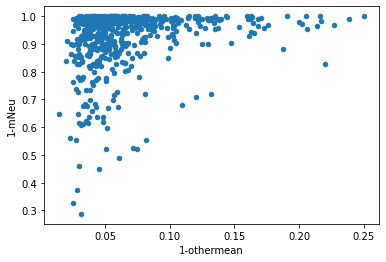

In [9]:
cpgdf.plot.scatter(x='1-othermean',y='1-'+celltype)

In [10]:
cpgdf=cpgdf.merge(RDstatdf,on=['chrom','start','end'])
cpgdf.head()

,chrom,start,end,CD4,CD8,nB,NK,Mn,mNeu,m8,...,1-othermean,1-mNeu,#TP_fragment,#FP_fragment,#TN_fragment,#FN_fragment,#Total_Fragment,TPR,FPR,FDR
0,chr1,13711400,13711402,1.000000,0.958000,0.982333,0.954000,0.947333,0.018,1.0000,...,0.050128,0.982,13.05,7.316667,152.733333,0.70,173.800000,0.979357,0.053203,0.739107
1,chr1,13711460,13711462,0.980000,0.915000,0.983000,0.955000,0.954333,0.005,0.9785,...,0.062859,0.995,21.30,6.650000,182.866667,0.05,210.866667,0.999406,0.035457,0.708345
2,chr1,13711468,13711470,0.970000,0.950667,0.993333,0.946667,0.934667,0.005,0.9590,...,0.066385,0.995,22.75,7.466667,180.233333,0.05,210.500000,0.999439,0.039700,0.714615
3,chr1,13711601,13711603,0.966000,0.940667,0.973333,0.951000,0.915333,0.036,0.9750,...,0.084256,0.964,11.10,11.500000,86.350000,0.00,108.950000,1.000000,0.111209,0.759482
4,chr1,21459674,21459676,0.962667,0.926000,0.977667,0.962000,0.745000,0.017,1.0000,...,0.106026,0.983,35.20,29.516667,238.783333,1.30,304.800000,0.861458,0.112271,0.772388


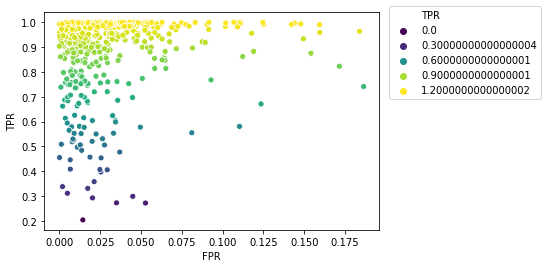

In [11]:

ax=sns.scatterplot(x='FPR',y='TPR', data=cpgdf, hue='TPR',palette="viridis")
ax.legend(loc=(1.03, 0.6))

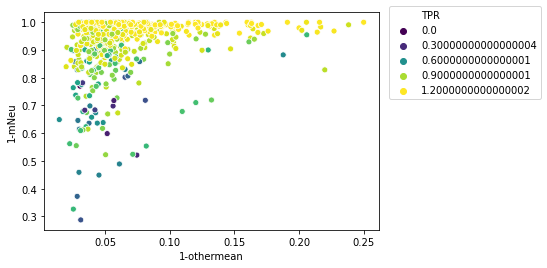

In [12]:
ax=sns.scatterplot(x='1-othermean',y='1-'+celltype, data=cpgdf, hue='TPR',palette="viridis")
ax.legend(loc=(1.03, 0.6))

In [13]:
def plt_corr(x, y,combined):
    fig = plt.figure()
    lm = sns.lmplot(x=x, y=y, data=combined)
    ax = lm.axes[0, 0]
    p_corr = np.around(corrdf_pearson[x][y], decimals=3)
    s_corr = np.around(corrdf_spearman[x][y], decimals=3)
    p_val_pearson = np.around(pearsonr(combined[x], combined[y])[1], decimals=8)
    p_val_spearman = np.around(spearmanr(combined[x], combined[y])[1], decimals=8)
    txt = 'r = ' + str(p_corr) + ', p-val = ' + str(p_val_pearson) + '\nrho = ' + str(s_corr) + ', p-val = ' + str(p_val_spearman)
    ax.text(np.array(combined[x].sort_values())[0], np.array(combined[y].sort_values())[-2], txt, horizontalalignment='left', verticalalignment='bottom')
    return lm

In [14]:

# sns.scatterplot(combined['FDR'], combined['FPR'])
corrdf_pearson=cpgdf.corr(method='pearson')
corrdf_spearman=cpgdf.corr(method='spearman')

<Figure size 432x288 with 0 Axes>

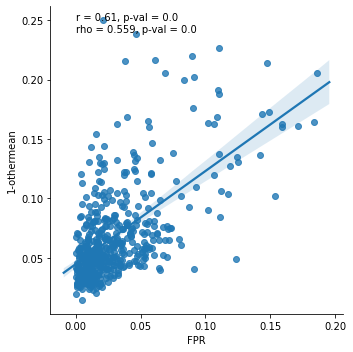

In [15]:
x = 'FPR'
y = '1-othermean'
fig = plt_corr(x, y,cpgdf)

<Figure size 432x288 with 0 Axes>

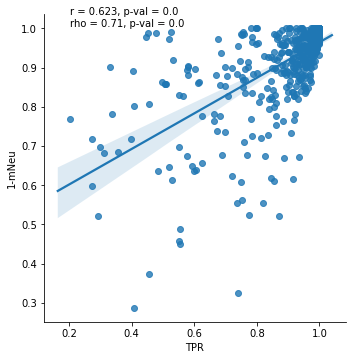

In [16]:
x = 'TPR'
y = '1-'+celltype
fig = plt_corr(x, y,cpgdf)

In [17]:
cpgdf.to_csv(DMRcpgfile+"_cpgdf.txt",sep="\t")

In [18]:
cpgtodmr=cpgdf.groupby('DMRname').mean()
cpgtodmr.head()

,start,end,CD4,CD8,nB,NK,Mn,mNeu,m8,DC,...,1-othermean,1-mNeu,#TP_fragment,#FP_fragment,#TN_fragment,#FN_fragment,#Total_Fragment,TPR,FPR,FDR
DMRname,,,,,,,,,,,,,,,,,,,,,
DMR1,1.371148e+07,1.371148e+07,0.979000,0.941083,0.983000,0.951667,0.937917,0.016000,0.978125,0.906417,...,0.065907,0.984000,17.050000,8.233333,150.545833,0.200000,176.029167,0.994550,0.059892,0.730387
DMR10,1.260325e+07,1.260325e+07,0.972000,0.940778,0.968389,0.977556,0.881667,0.127278,0.956417,0.907222,...,0.053098,0.872722,31.391667,5.313889,265.886111,4.841667,307.433333,0.860613,0.019606,0.739964
DMR11,6.896337e+07,6.896337e+07,0.967083,0.965417,0.974083,0.963000,0.887167,0.085167,0.972875,0.873083,...,0.066090,0.914833,14.062500,6.233333,109.841667,0.737500,130.875000,0.943807,0.052865,0.761140
DMR12,1.003556e+08,1.003556e+08,0.986917,0.960833,0.966208,0.948458,0.978833,0.132542,0.950375,0.982583,...,0.044032,0.867458,36.150000,14.604167,288.508333,6.537500,345.800000,0.727897,0.053291,0.759404
DMR13,1.177047e+08,1.177047e+08,0.926167,0.909917,0.912000,0.881417,0.838333,0.024000,0.884750,0.758417,...,0.150115,0.976000,34.812500,14.608333,211.791667,0.962500,262.175000,0.988336,0.065586,0.759152


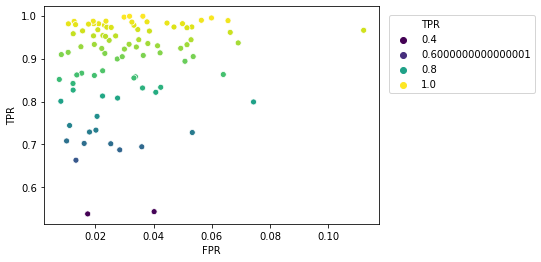

In [19]:
ax=sns.scatterplot(x='FPR',y='TPR', data=cpgtodmr, hue='TPR',palette="viridis")
ax.legend(loc=(1.03, 0.6))

In [20]:
cpgtodmr.to_csv(DMRcpgfile+"_cpgtodmr.txt",sep="\t")